# 优化等级标注预测详细流程——数据处理

In [1]:
# 引入工程所需要的库
from pyecharts import online
online() # 使用远程 jshost

In [2]:
import numpy as np
import pandas as pd 

In [3]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# 1. 数据总览

## 1.1 加载数据

In [4]:
# 原始数据路径
train_path = 'D://training-final.csv'
test_path = 'D://Semifinal-testing-final.csv'

# 读取原始数据
# train_data-final数据
train_data = pd.read_csv(train_path, names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'hand'])
# preliminary-testing数据
test_data = pd.read_csv(test_path, names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5'])


In [5]:
train_data.shape

(6000, 11)

In [6]:
test_data.shape

(1000000, 10)

观察前几行的源数据：

In [7]:
train_data.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,H,Q,H,J,H,10,H,K,H,1,1
1,S,Q,S,K,S,J,S,10,S,1,1
2,D,10,D,J,D,Q,D,K,D,1,1
3,C,K,C,J,C,10,C,1,C,Q,1
4,C,J,C,K,C,1,C,Q,C,10,1


In [8]:
test_data.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,D,6,C,2,D,9,S,2,S,9
1,C,3,S,Q,H,1,D,1,S,9
2,H,7,D,7,S,5,C,Q,C,4
3,D,10,D,7,H,3,H,9,C,3
4,S,K,H,6,H,3,D,4,H,9


数据信息总览：

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
S1      6000 non-null object
C1      6000 non-null object
S2      6000 non-null object
C2      6000 non-null object
S3      6000 non-null object
C3      6000 non-null object
S4      6000 non-null object
C4      6000 non-null object
S5      6000 non-null object
C5      6000 non-null object
hand    6000 non-null int64
dtypes: int64(1), object(10)
memory usage: 515.7+ KB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
S1    1000000 non-null object
C1    1000000 non-null object
S2    1000000 non-null object
C2    1000000 non-null object
S3    1000000 non-null object
C3    1000000 non-null object
S4    1000000 non-null object
C4    1000000 non-null object
S5    1000000 non-null object
C5    1000000 non-null object
dtypes: object(10)
memory usage: 76.3+ MB


从上面的数据我们可以看出training-final（train_data）有11列，共6000条数据，无缺失数据；Semifinal-testing-final（test_data）有10列，共1000000条数据，无缺失数据。

# 2. 数据处理

## 2.1 变量转换

变量转换的目的是将数据转换为适用于模型使用的数据，不同模型接受不同类型的数据，Scikit-learn要求数据都是数字型numeric，所以我们要将一些非数字型的原始数据转换为数字型numeric。 所以下面对数据的转换进行介绍，以在进行特征工程的时候使用。 

In [11]:
# --------将J、Q、K映射成11、12、13------
def transform_jkq(x):
    if x == 'J':
        return 11
    elif x == 'Q':
        return 12
    elif x == 'K':
        return 13
    else:
        return x

In [12]:
# training-final数据处理
train_data['C1'] = train_data['C1'].apply(transform_jkq)
train_data['C2'] = train_data['C2'].apply(transform_jkq)
train_data['C3'] = train_data['C3'].apply(transform_jkq)
train_data['C4'] = train_data['C4'].apply(transform_jkq)
train_data['C5'] = train_data['C5'].apply(transform_jkq)

In [13]:
# Semifinal-testing-final数据处理
test_data['C1'] = test_data['C1'].apply(transform_jkq)
test_data['C2'] = test_data['C2'].apply(transform_jkq)
test_data['C3'] = test_data['C3'].apply(transform_jkq)
test_data['C4'] = test_data['C4'].apply(transform_jkq)
test_data['C5'] = test_data['C5'].apply(transform_jkq)

In [14]:
# -------将C、D、H、S 映射为1、2、3、4--------
encode_map = {'C':1, 'D':2, 'H':3,'S':4}

In [15]:
# training-final数据处理
train_data['S1'] = train_data['S1'].map(encode_map)
train_data['S2'] = train_data['S2'].map(encode_map)
train_data['S3'] = train_data['S3'].map(encode_map)
train_data['S4'] = train_data['S4'].map(encode_map)
train_data['S5'] = train_data['S5'].map(encode_map)

In [16]:
# Semifinal-testing-final数据处理
test_data['S1'] = test_data['S1'].map(encode_map)
test_data['S2'] = test_data['S2'].map(encode_map)
test_data['S3'] = test_data['S3'].map(encode_map)
test_data['S4'] = test_data['S4'].map(encode_map)
test_data['S5'] = test_data['S5'].map(encode_map)

In [17]:
train_data.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,3,12,3,11,3,10,3,13,3,1,1
1,4,12,4,13,4,11,4,10,4,1,1
2,2,10,2,11,2,12,2,13,2,1,1
3,1,13,1,11,1,10,1,1,1,12,1
4,1,11,1,13,1,1,1,12,1,10,1


In [18]:
test_data.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,2,6,1,2,2,9,4,2,4,9
1,1,3,4,12,3,1,2,1,4,9
2,3,7,2,7,4,5,1,12,1,4
3,2,10,2,7,3,3,3,9,1,3
4,4,13,3,6,3,3,2,4,3,9


# 3. 分析数据关系

In [19]:
#牌的花色与优化等级标注的关系

In [40]:
rank_count = train_data.groupby(['S1','S2','S3','S4','S5', 'hand']).count()
rank_count[:10]

C1  C2  C3  C4  C5
S1 S2 S3 S4 S5 hand                    
1  1  1  1  1  1      2   2   2   2   2
               3      1   1   1   1   1
               7      6   6   6   6   6
            2  0      4   4   4   4   4
               8      5   5   5   5   5
            3  0      4   4   4   4   4
               8      2   2   2   2   2
            4  0      1   1   1   1   1
         2  1  0      2   2   2   2   2
            2  0      6   6   6   6   6

In [21]:
#牌面大小与优化等级标注的关系

In [39]:
rank_count = train_data.groupby(['C1','C2','C3','C4','C5', 'hand']).count()
rank_count[:10]

S1  S2  S3  S4  S5
C1 C2 C3 C4 C5 hand                    
11 11 11 13 3  9      1   1   1   1   1
         4  12 9      2   2   2   2   2
      12 12 5  4      1   1   1   1   1
         9  5  8      1   1   1   1   1
            7  8      1   1   1   1   1
      13 8  5  8      1   1   1   1   1
      10 1  4  8      1   1   1   1   1
         6  10 4      1   1   1   1   1
         7  13 8      1   1   1   1   1
      2  6  12 8      1   1   1   1   1

分析：
0: Nothing in hand; not a recognized poker hand 
1: Royal flush; {Ace, King, Queen, Jack, Ten} + flush
2: Straight; five cards, sequentially ranked with no gaps
3: Straight flush; straight + flush
4: Two pairs; two pairs of equal ranks within five cards
5: Four of a kind; four equal ranks within five cards
6: Full house; pair + different rank three of a kind
7: Flush; five cards with the same suit
8: Three of a kind; three equal ranks within five cards
9: One pair; one pair of equal ranks within five cards

# 4. 特征工程

## 4.1 特征提取

In [23]:
# --------计算四种花色的数量和13种排名的有无---------
def bincount2D_vectorized(a):
    N = a.max()+1
    a_offs = a + np.arange(a.shape[0])[:,None]*N
    return np.bincount(a_offs.ravel(), minlength=a.shape[0]*N).reshape(-1,N)


In [24]:
# training-final数据处理
# 计算四种花色的数量
S_training = train_data.iloc[:, [0, 2, 4, 6, 8]].astype(int)
S_training = pd.DataFrame(bincount2D_vectorized(S_training.values),columns=['suitCount0','suitCount1','suitCount2','suitCount3','suitCount4'])
train_data = pd.merge(train_data, S_training, how='left', left_index=True, right_index=True).drop(['suitCount0'], axis=1)

### 4.1.1 画四种花色的数量与优化等级标注相关系数矩阵的热点图

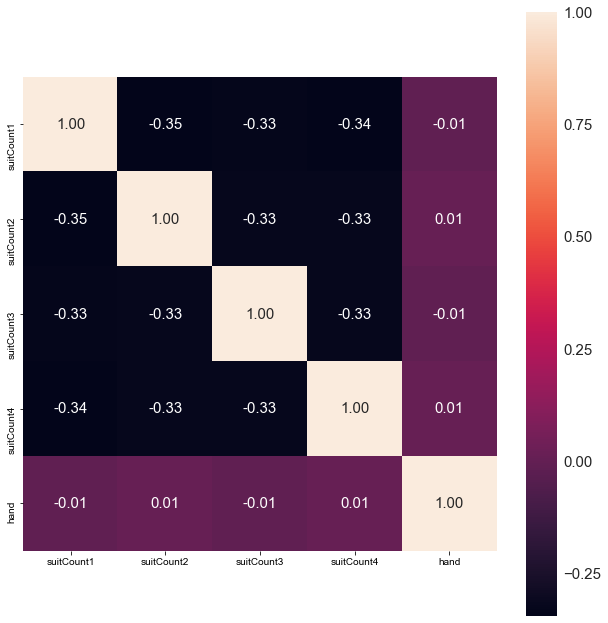

In [25]:
fig, ax = plt.subplots(figsize = (9,9))
# correlation map
cols = ['suitCount1','suitCount2','suitCount3','suitCount4', 'hand']
cm = np.corrcoef(train_data[cols].values.T)  # 计算相关系数
sns.set(font_scale=1.5)

# 画相关系数矩阵的热点图
hm = sns.heatmap(cm, 
        annot=True, 
        square=True,
        fmt='.2f',
        annot_kws={'size': 15},
        yticklabels=cols,
        xticklabels=cols)
plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)

In [26]:
#计算13种排名的有无
R_training = train_data.iloc[:, np.arange(1, 10, 2)].astype(int)
cols = ['rank{}'.format(x) for x in range(0,14,1)]
R_training = pd.DataFrame(bincount2D_vectorized(R_training.values),columns=cols)
train_data = pd.merge(train_data, R_training, how='left', left_index=True, right_index=True).drop(['rank0'], axis=1)

### 4.1.2 各个排名的有无与优化等级标注相关系数矩阵的热点图

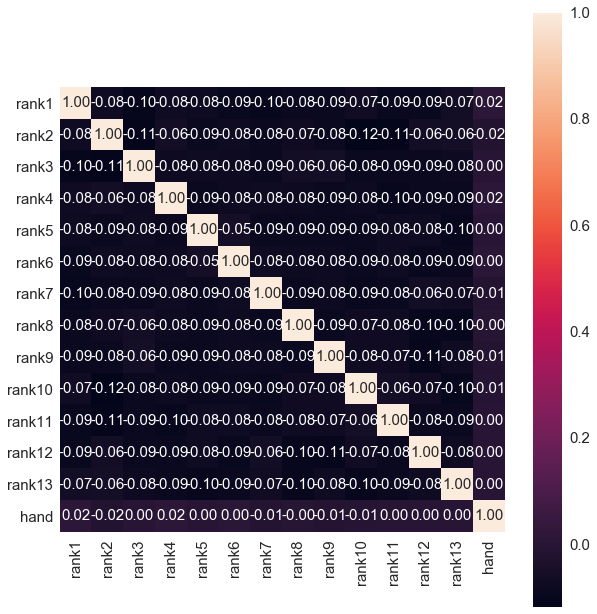

In [27]:
fig, ax = plt.subplots(figsize = (9,9))
# correlation map
cols = ['rank{}'.format(x) for x in range(1,14,1)]+['hand']
cm = np.corrcoef(train_data[cols].values.T)  # 计算相关系数
sns.set(font_scale=1.5)

# 画相关系数矩阵的热点图
hm = sns.heatmap(cm, 
        annot=True, 
        square=True,
        fmt='.2f',
        annot_kws={'size': 15},
        yticklabels=cols,
        xticklabels=cols)
plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)

In [28]:
# Semifinal-testing-final数据处理
#计算13种排名的有无
S_source_data = test_data.iloc[:, [0, 2, 4, 6, 8]].astype(int)
S_source_data = pd.DataFrame(bincount2D_vectorized(S_source_data.values),columns=['suitCount0','suitCount1','suitCount2','suitCount3','suitCount4'])
test_data = pd.merge(test_data, S_source_data, how='left', left_index=True, right_index=True).drop(['suitCount0'], axis=1)
#计算13种排名的有无
R_source_data = test_data.iloc[:, np.arange(1, 10, 2)].astype(int)
cols = ['rank{}'.format(x) for x in range(0,14,1)]
R_source_data = pd.DataFrame(bincount2D_vectorized(R_source_data.values),columns=cols)
test_data = pd.merge(test_data, R_source_data, how='left', left_index=True, right_index=True).drop(['rank0'], axis=1)

In [29]:
# ------各种排名的种类数------

In [30]:

# ttraining-final数据处理
R_training = train_data.loc[:, ['rank{}'.format(n) for n in range(1, 14, 1)]].astype(int)
R_training = pd.DataFrame(bincount2D_vectorized(R_training.values),columns=['rankCount{}'.format(n) for n in range(0,5,1)])
train_data = pd.merge(train_data, R_training, how='left', left_index=True, right_index=True).drop(['rankCount0'], axis=1)

### 4.1.3 各个排名的个数与优化等级标注相关系数矩阵的热点图

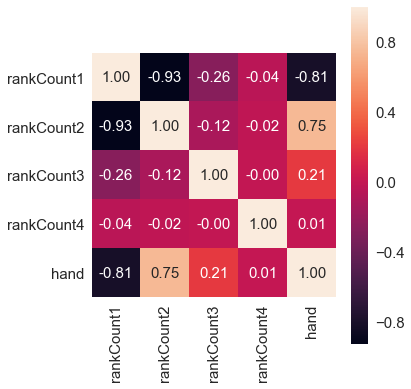

In [31]:
fig, ax = plt.subplots(figsize = (6,6))
# correlation map
cols = ['rankCount{}'.format(n) for n in range(1,5,1)]+['hand']
cm = np.corrcoef(train_data[cols].values.T)  # 计算相关系数
sns.set(font_scale=1.5)

# 画相关系数矩阵的热点图
hm = sns.heatmap(cm, 
        annot=True, 
        square=True,
        fmt='.2f',
        annot_kws={'size': 15},
        yticklabels=cols,
        xticklabels=cols)
plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)

In [32]:
# Semifinal-testing-final数据处理
R_source_data = test_data.loc[:, ['rank{}'.format(n) for n in range(1, 14, 1)]].astype(int)
R_source_data = pd.DataFrame(bincount2D_vectorized(R_source_data.values),columns=['rankCount{}'.format(n) for n in range(0,5,1)])
test_data = pd.merge(test_data, R_source_data, how='left', left_index=True, right_index=True).drop(['rankCount0'], axis=1)

In [33]:
# ------13种排名各排名之间的差值的绝对值-----

In [34]:
# Semifinal-testing-final数据处理
#train_data['diff1_13'] = np.abs(train_data['rank1'] - train_data['rank13'])
for i in range(2,14,1):
    train_data['diff{}_{}'.format(i, i - 1)] = np.abs(train_data['rank{}'.format(i)] - train_data['rank{}'.format(i - 1)])
# train_data['diff13_1'] = np.abs(train_data['rank13'] - train_data['rank1'])

### 4.1.4 各个排名的间隔为1位的差值与优化等级标注相关系数矩阵的热点图

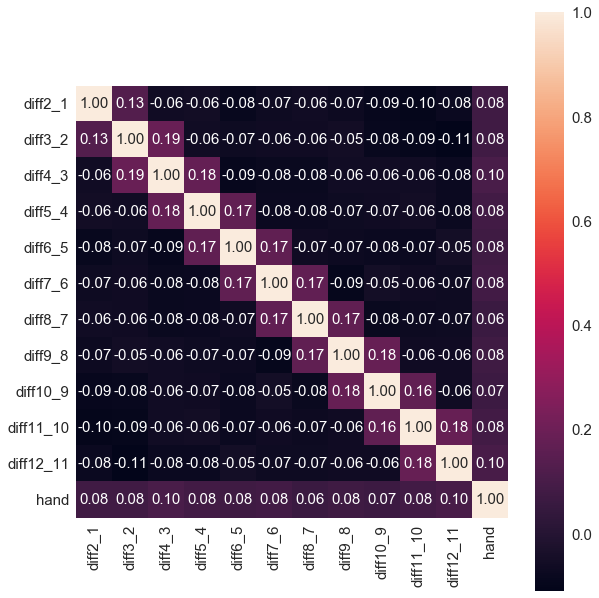

In [35]:
fig, ax = plt.subplots(figsize = (9,9))
# correlation map
cols = ['diff{}_{}'.format(i, i - 1) for i in range(2, 13, 1)]+['hand']
cm = np.corrcoef(train_data[cols].values.T)  # 计算相关系数
sns.set(font_scale=1.5)

# 画相关系数矩阵的热点图
hm = sns.heatmap(cm, 
        annot=True, 
        square=True,
        fmt='.2f',
        annot_kws={'size': 15},
        yticklabels=cols,
        xticklabels=cols)
plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)

In [36]:
# training-final数据处理
#train_data['diff1_12'] = np.abs(train_data['rank1'] - train_data['rank12'])
#train_data['diff2_13'] = np.abs(train_data['rank2'] - train_data['rank13'])
for i in range(3,14,1):
    train_data['diff{}_{}'.format(i, i - 2)] = np.abs(train_data['rank{}'.format(i)] - train_data['rank{}'.format(i - 2)])
# train_data['diff13_1'] = np.abs(train_data['rank13'] - train_data['rank1'])

### 4.1.5 各个排名的间隔为2位的差值与优化等级标注相关系数矩阵的热点图

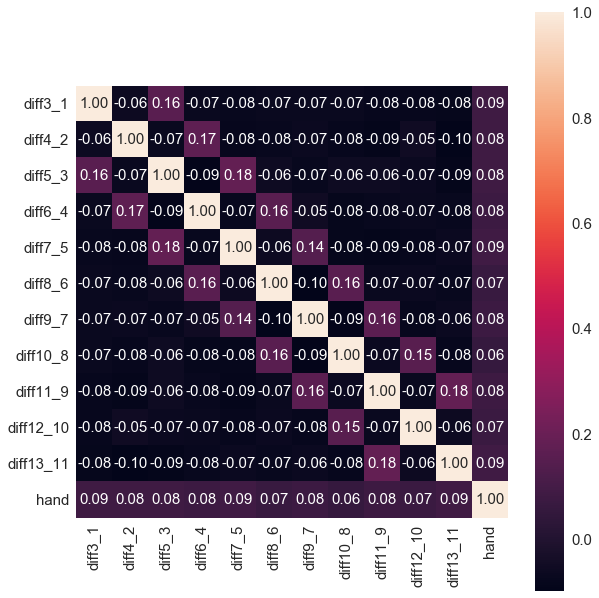

In [37]:
fig, ax = plt.subplots(figsize = (9,9))
# correlation map
cols = ['diff{}_{}'.format(i, i - 2) for i in range(3, 14, 1)]+['hand']
cm = np.corrcoef(train_data[cols].values.T)  # 计算相关系数
sns.set(font_scale=1.5)

# 画相关系数矩阵的热点图
hm = sns.heatmap(cm, 
        annot=True, 
        square=True,
        fmt='.2f',
        annot_kws={'size': 15},
        yticklabels=cols,
        xticklabels=cols)
plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)

In [38]:
for i in range(4,14,1):
    train_data['diff{}_{}'.format(i, i - 3)] = np.abs(train_data['rank{}'.format(i)] - train_data['rank{}'.format(i - 3)])
# train_data['diff13_1'] = np.abs(train_data['rank13'] - train_data['rank1'])

### 4.1.6各个排名的间隔为3位的差值与优化等级标注相关系数矩阵的热点图

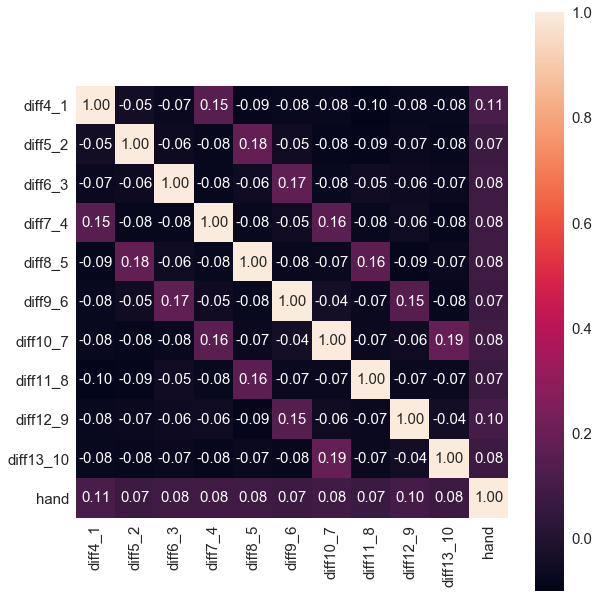

In [39]:
fig, ax = plt.subplots(figsize = (9,9))
cols = ['diff{}_{}'.format(i, i - 3) for i in range(4, 14, 1)]+['hand']
cm = np.corrcoef(train_data[cols].values.T)  # 计算相关系数
sns.set(font_scale=1.5)

# 画相关系数矩阵的热点图
hm = sns.heatmap(cm, 
        annot=True, 
        square=True,
        fmt='.2f',
        annot_kws={'size': 15},
        yticklabels=cols,
        xticklabels=cols)
plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)

In [40]:
for i in range(5,14,1):
    train_data['diff{}_{}'.format(i, i - 4)] = np.abs(train_data['rank{}'.format(i)] - train_data['rank{}'.format(i - 4)])

### 4.1.5 各个排名的间隔为4位的差值与优化等级标注相关系数矩阵的热点图

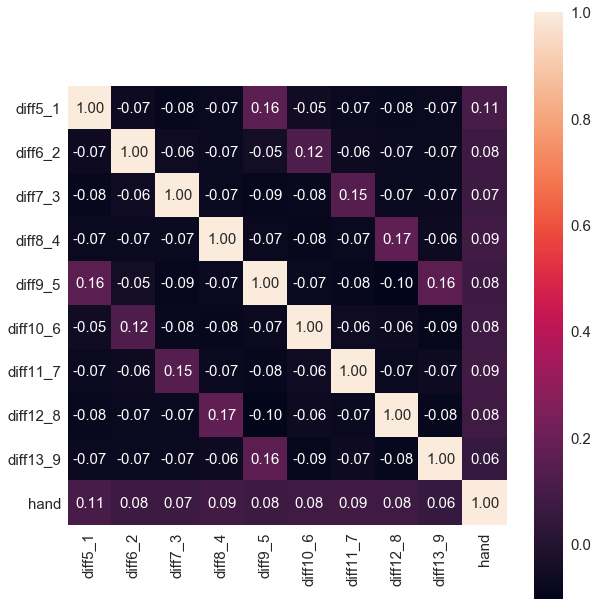

In [41]:
fig, ax = plt.subplots(figsize = (9,9))
cols = ['diff{}_{}'.format(i, i - 4) for i in range(5, 14, 1)]+['hand']
cm = np.corrcoef(train_data[cols].values.T)  # 计算相关系数
sns.set(font_scale=1.5)

# 画相关系数矩阵的热点图
hm = sns.heatmap(cm, 
        annot=True, 
        square=True,
        fmt='.2f',
        annot_kws={'size': 15},
        yticklabels=cols,
        xticklabels=cols)
plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)

In [42]:
for i in range(6,14,1):
    train_data['diff{}_{}'.format(i, i - 5)] = np.abs(train_data['rank{}'.format(i)] - train_data['rank{}'.format(i - 5)])

### 4.1.6 各个排名的间隔为5位的差值与优化等级标注相关系数矩阵的热点图

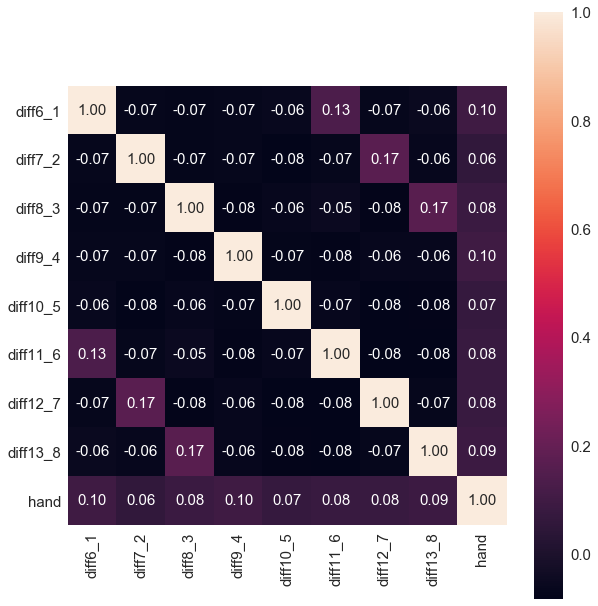

In [43]:
fig, ax = plt.subplots(figsize = (9,9))
cols = ['diff{}_{}'.format(i, i - 5) for i in range(6, 14, 1)]+['hand']
cm = np.corrcoef(train_data[cols].values.T)  # 计算相关系数
sns.set(font_scale=1.5)

# 画相关系数矩阵的热点图
hm = sns.heatmap(cm, 
        annot=True, 
        square=True,
        fmt='.2f',
        annot_kws={'size': 15},
        yticklabels=cols,
        xticklabels=cols)


plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)

In [44]:
for i in range(7,14,1):
    train_data['diff{}_{}'.format(i, i - 6)] = np.abs(train_data['rank{}'.format(i)] - train_data['rank{}'.format(i - 6)])

### 4.1.7 各个排名的间隔为6位的差值与优化等级标注相关系数矩阵的热点图

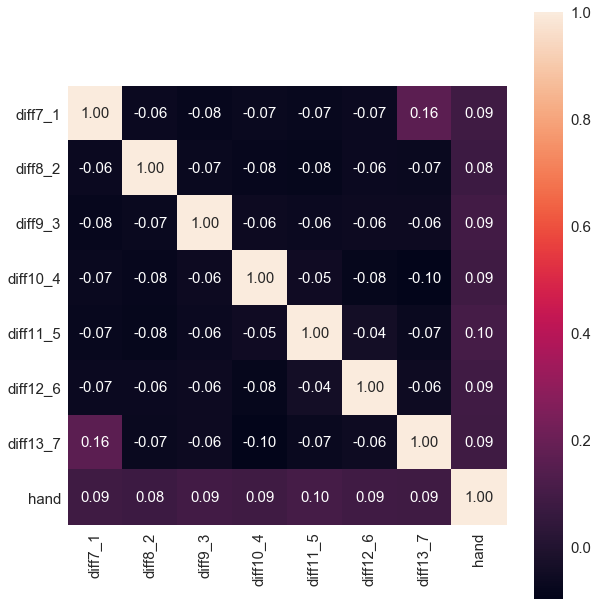

In [45]:
fig, ax = plt.subplots(figsize = (9,9))
# correlation map
cols = ['diff{}_{}'.format(i, i - 6) for i in range(7, 14, 1)]+['hand']
cm = np.corrcoef(train_data[cols].values.T)  # 计算相关系数
sns.set(font_scale=1.5)

# 画相关系数矩阵的热点图
hm = sns.heatmap(cm, 
        annot=True, 
        square=True,
        fmt='.2f',
        annot_kws={'size': 15},
        yticklabels=cols,
        xticklabels=cols)
plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)

In [46]:
for i in range(8,14,1):
    train_data['diff{}_{}'.format(i, i - 7)] = np.abs(train_data['rank{}'.format(i)] - train_data['rank{}'.format(i - 7)])


### 4.1.8 各个排名的间隔为7位的差值与优化等级标注相关系数矩阵的热点图

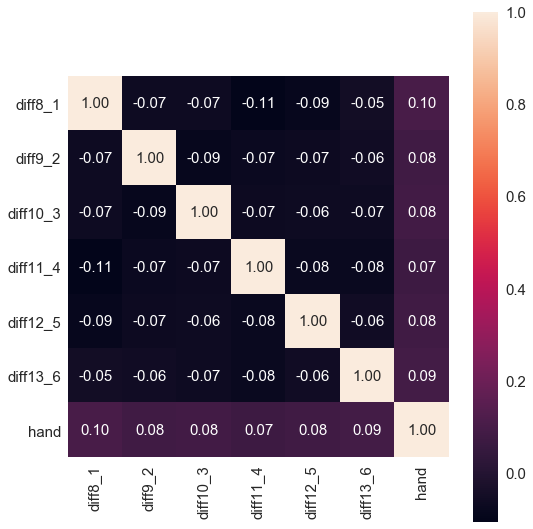

In [47]:
fig, ax = plt.subplots(figsize = (8,8))
# correlation map
cols = ['diff{}_{}'.format(i, i - 7) for i in range(8, 14, 1)]+['hand']
cm = np.corrcoef(train_data[cols].values.T)  # 计算相关系数
sns.set(font_scale=1.5)

# 画相关系数矩阵的热点图
hm = sns.heatmap(cm, 
        annot=True, 
        square=True,
        fmt='.2f',
        annot_kws={'size': 15},
        yticklabels=cols,
        xticklabels=cols)
plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)

In [48]:
for i in range(9,14,1):
    train_data['diff{}_{}'.format(i, i - 8)] = np.abs(train_data['rank{}'.format(i)] - train_data['rank{}'.format(i - 8)])


### 4.1.9 各个排名的间隔为8位的差值与优化等级标注相关系数矩阵的热点图

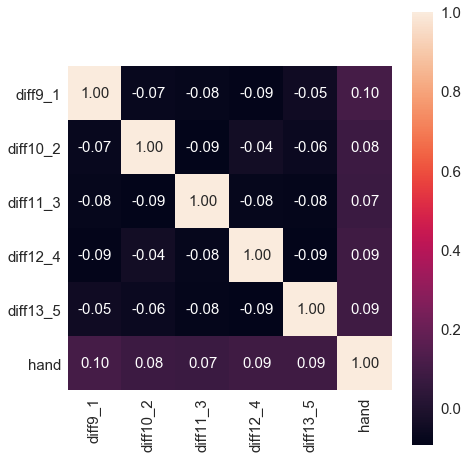

In [49]:
fig, ax = plt.subplots(figsize = (7,7))
# correlation map
cols = ['diff{}_{}'.format(i, i - 8) for i in range(9, 14, 1)]+['hand']
cm = np.corrcoef(train_data[cols].values.T)  # 计算相关系数
sns.set(font_scale=1.5)

# 画相关系数矩阵的热点图
hm = sns.heatmap(cm, 
        annot=True, 
        square=True,
        fmt='.2f',
        annot_kws={'size': 15},
        yticklabels=cols,
        xticklabels=cols)
plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)

In [50]:
for i in range(10,14,1):
    train_data['diff{}_{}'.format(i, i - 9)] = np.abs(train_data['rank{}'.format(i)] - train_data['rank{}'.format(i - 9)])

### 4.1.10 各个排名的间隔为9位的差值与优化等级标注相关系数矩阵的热点图

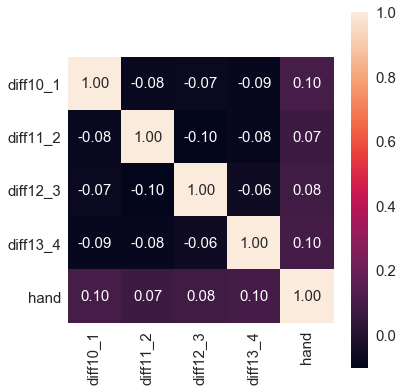

In [51]:
fig, ax = plt.subplots(figsize = (6,6))
# correlation map
cols = ['diff{}_{}'.format(i, i - 9) for i in range(10, 14, 1)]+['hand']
cm = np.corrcoef(train_data[cols].values.T)  # 计算相关系数
sns.set(font_scale=1.5)

# 画相关系数矩阵的热点图
hm = sns.heatmap(cm, 
        annot=True, 
        square=True,
        fmt='.2f',
        annot_kws={'size': 15},
        yticklabels=cols,
        xticklabels=cols)
plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)

In [52]:
for i in range(11,14,1):
    train_data['diff{}_{}'.format(i, i - 10)] = np.abs(train_data['rank{}'.format(i)] - train_data['rank{}'.format(i - 10)])

### 4.1.11 各个排名的间隔为10位的差值与优化等级标注相关系数矩阵的热点图

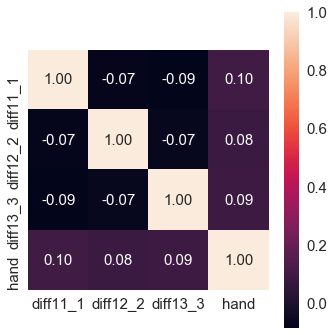

In [53]:
fig, ax = plt.subplots(figsize = (5,5))

# correlation map
cols = ['diff{}_{}'.format(i, i - 10) for i in range(11, 14, 1)]+['hand']
cm = np.corrcoef(train_data[cols].values.T)  # 计算相关系数
sns.set(font_scale=1.5)

# 画相关系数矩阵的热点图
hm = sns.heatmap(cm, 
        annot=True, 
        square=True,
        fmt='.2f',
        annot_kws={'size': 15},
        yticklabels=cols,
        xticklabels=cols)
plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)

In [54]:
for i in range(12,14,1):
    train_data['diff{}_{}'.format(i, i - 11)] = np.abs(train_data['rank{}'.format(i)] - train_data['rank{}'.format(i - 11)])

### 4.1.11 各个排名的间隔为12位的差值与优化等级标注相关系数矩阵的热点图

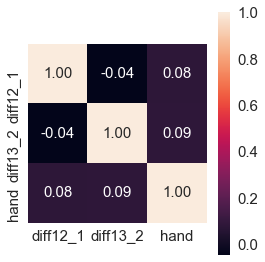

In [55]:
fig, ax = plt.subplots(figsize = (4,4))
# correlation map
cols = ['diff{}_{}'.format(i, i - 11) for i in range(12, 14, 1)]+['hand']
cm = np.corrcoef(train_data[cols].values.T)  # 计算相关系数
sns.set(font_scale=1.5)

# 画相关系数矩阵的热点图
hm = sns.heatmap(cm, 
        annot=True, 
        square=True,
        fmt='.2f',
        annot_kws={'size': 15},
        yticklabels=cols,
        xticklabels=cols)
plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)

In [56]:
for i in range(13,14,1):
    train_data['diff{}_{}'.format(i, i - 12)] = np.abs(train_data['rank{}'.format(i)] - train_data['rank{}'.format(i - 12)])

### 4.1.12 各个排名的间隔为13位的差值与优化等级标注相关系数矩阵的热点图

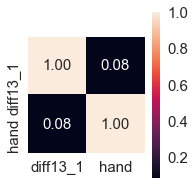

In [57]:
fig, ax = plt.subplots(figsize = (3,3))
# correlation map
cols = ['diff{}_{}'.format(i, i - 12) for i in range(13, 14, 1)]+['hand']
cm = np.corrcoef(train_data[cols].values.T)  # 计算相关系数
sns.set(font_scale=1.5)

# 画相关系数矩阵的热点图
hm = sns.heatmap(cm, 
        annot=True, 
        square=True,
        fmt='.2f',
        annot_kws={'size': 15},
        yticklabels=cols,
        xticklabels=cols)
plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)

In [58]:
# Semifinal-testing-final数据处理
for i in range(2,14,1):
    test_data['diff{}_{}'.format(i, i - 1)] = np.abs(test_data['rank{}'.format(i)] - test_data['rank{}'.format(i - 1)])

for i in range(3,14,1):
    test_data['diff{}_{}'.format(i, i - 2)] = np.abs(test_data['rank{}'.format(i)] - test_data['rank{}'.format(i - 2)])

for i in range(4,14,1):
    test_data['diff{}_{}'.format(i, i - 3)] = np.abs(test_data['rank{}'.format(i)] - test_data['rank{}'.format(i - 3)])

for i in range(5,14,1):
    test_data['diff{}_{}'.format(i, i - 4)] = np.abs(test_data['rank{}'.format(i)] - test_data['rank{}'.format(i - 4)])

for i in range(6,14,1):
    test_data['diff{}_{}'.format(i, i - 5)] = np.abs(test_data['rank{}'.format(i)] - test_data['rank{}'.format(i - 5)])

for i in range(7,14,1):
    test_data['diff{}_{}'.format(i, i - 6)] = np.abs(test_data['rank{}'.format(i)] - test_data['rank{}'.format(i - 6)])

for i in range(8,14,1):
    test_data['diff{}_{}'.format(i, i - 7)] = np.abs(test_data['rank{}'.format(i)] - test_data['rank{}'.format(i - 7)])

for i in range(9,14,1):
    test_data['diff{}_{}'.format(i, i - 8)] = np.abs(test_data['rank{}'.format(i)] - test_data['rank{}'.format(i - 8)])

for i in range(10,14,1):
    test_data['diff{}_{}'.format(i, i - 9)] = np.abs(test_data['rank{}'.format(i)] - test_data['rank{}'.format(i - 9)])

for i in range(11,14,1):
    test_data['diff{}_{}'.format(i, i - 10)] = np.abs(test_data['rank{}'.format(i)] - test_data['rank{}'.format(i - 10)])

for i in range(12,14,1):
    test_data['diff{}_{}'.format(i, i - 11)] = np.abs(test_data['rank{}'.format(i)] - test_data['rank{}'.format(i - 11)])

for i in range(13,14,1):
    test_data['diff{}_{}'.format(i, i - 12)] = np.abs(test_data['rank{}'.format(i)] - test_data['rank{}'.format(i - 12)])

In [59]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 110 entries, S1 to diff13_1
dtypes: int64(105), object(5)
memory usage: 5.0+ MB


In [60]:
train_data.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,...,diff10_1,diff11_2,diff12_3,diff13_4,diff11_1,diff12_2,diff13_3,diff12_1,diff13_2,diff13_1
0,3,12,3,11,3,10,3,13,3,1,...,0,1,1,1,0,1,1,0,1,0
1,4,12,4,13,4,11,4,10,4,1,...,0,1,1,1,0,1,1,0,1,0
2,2,10,2,11,2,12,2,13,2,1,...,0,1,1,1,0,1,1,0,1,0
3,1,13,1,11,1,10,1,1,1,12,...,0,1,1,1,0,1,1,0,1,0
4,1,11,1,13,1,1,1,12,1,10,...,0,1,1,1,0,1,1,0,1,0


In [61]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 109 entries, S1 to diff13_1
dtypes: int64(104), object(5)
memory usage: 831.6+ MB


In [62]:
test_data.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,...,diff10_1,diff11_2,diff12_3,diff13_4,diff11_1,diff12_2,diff13_3,diff12_1,diff13_2,diff13_1
0,2,6,1,2,2,9,4,2,4,9,...,0,2,0,0,0,2,0,0,2,0
1,1,3,4,12,3,1,2,1,4,9,...,2,0,0,0,2,1,1,1,0,2
2,3,7,2,7,4,5,1,12,1,4,...,0,0,1,1,0,1,0,1,0,0
3,2,10,2,7,3,3,3,9,1,3,...,1,0,2,0,0,0,2,0,0,0
4,4,13,3,6,3,3,2,4,3,9,...,0,0,1,0,0,0,0,0,1,1


## 4.2 弃掉无用特征

对于上面的特征工程中，我们从一些原始的特征中提取出了很多要融合到模型中的特征，但是我们需要剔除那些原本的我们用不到的或者非数值特征：

首先对我们的数据先进行一下备份，以便后期的再次分析

In [63]:
data_backup = train_data.copy()

# ------删除原始特征和13种花色的有无-----

# training-final数据处理
train_data = train_data.drop(['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5'], axis=1)
#train_data = train_data.drop(['rank{}'.format(n) for n in range(1, 14, 1)], axis=1)

# Semifinal-testing-final数据处理
test_data = test_data.drop(['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5'], axis=1)
#test_data = test_data.drop(['rank{}'.format(n) for n in range(1, 14, 1)], axis=1)


In [64]:
train_data[:5]

,hand,suitCount1,suitCount2,suitCount3,suitCount4,rank1,rank2,rank3,rank4,rank5,...,diff10_1,diff11_2,diff12_3,diff13_4,diff11_1,diff12_2,diff13_3,diff12_1,diff13_2,diff13_1
0,1,0,0,5,0,1,0,0,0,0,...,0,1,1,1,0,1,1,0,1,0
1,1,0,0,0,5,1,0,0,0,0,...,0,1,1,1,0,1,1,0,1,0
2,1,0,5,0,0,1,0,0,0,0,...,0,1,1,1,0,1,1,0,1,0
3,1,5,0,0,0,1,0,0,0,0,...,0,1,1,1,0,1,1,0,1,0
4,1,5,0,0,0,1,0,0,0,0,...,0,1,1,1,0,1,1,0,1,0


In [65]:
test_data[:5]

,suitCount1,suitCount2,suitCount3,suitCount4,rank1,rank2,rank3,rank4,rank5,rank6,...,diff10_1,diff11_2,diff12_3,diff13_4,diff11_1,diff12_2,diff13_3,diff12_1,diff13_2,diff13_1
0,1,2,0,2,0,2,0,0,0,1,...,0,2,0,0,0,2,0,0,2,0
1,1,1,1,2,2,0,1,0,0,0,...,2,0,0,0,2,1,1,1,0,2
2,2,1,1,1,0,0,0,1,1,0,...,0,0,1,1,0,1,0,1,0,0
3,1,2,2,0,0,0,2,0,0,0,...,1,0,2,0,0,0,2,0,0,0
4,0,1,3,1,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,1


# 6. 输入模型前的一些处理

## 6.1  数据不均衡处理

### 6.1.1 查看处理前是否均衡

In [66]:
#查看数据是否均衡
value_count = train_data.hand.value_counts()
value_count

0    2971
8    2470
4     353
9     138
2      28
7      14
6      14
3       5
1       5
5       2
Name: hand, dtype: int64

In [67]:
#将各类数据的数量进行可视化展现
from pyecharts import Pie

attr = value_count.index.values.astype(str)
v1 = value_count.values
pie = Pie()
pie.add("", attr, v1, is_label_show=True, legend_orient='vertical', legend_pos='left')
pie

从上数分析可以看出，训练数据training-final（train_data）极度不平衡，其中标签为3、1、5的数据数量不足10条，这对模型的影响是非常大的，所以需要进行不平衡数据的相关处理。

### 6.1.2 不均衡数据处理

针对不平衡数据, 最简单的一种方法就是生成少数类的样本, 这其中最基本的一种方法就是: 从少数类的样本中进行随机采样来增加新的样本, 利用RandomOverSampler 函数就能实现上述的功能。为了保留更多的原始数据的特征信息，只针对不平衡数据中少数类进行随机过采样。

In [68]:
from imblearn.over_sampling import RandomOverSampler

X = train_data.drop(['hand'], axis=1)
Y = train_data.hand

ros = RandomOverSampler(random_state=24)
X_resampled, Y_resampled = ros.fit_sample(X, Y)
X_resampled.shape

(29710L, 99L)

### 6.1.3 查看处理后是否均衡

In [69]:
value_count = pd.Series(Y_resampled).value_counts()
value_count

9    2971
8    2971
7    2971
6    2971
5    2971
4    2971
3    2971
2    2971
1    2971
0    2971
dtype: int64

In [70]:
attr = value_count.index.values.astype(str)
v1 = value_count.values
pie = Pie()
pie.add("", attr, v1, is_label_show=True, legend_orient='vertical', legend_pos='left')
pie

分析：从上图可以看出，经过对不平衡数据的处理后，用于训练模型的数据基本趋于平衡。

# 7. 将处理后的数据保存到文件当中

In [77]:
X_resampled_df = pd.DataFrame(X_resampled.astype(int), columns=X.columns)
Y_resampled_df = pd.DataFrame(Y_resampled.astype(int), columns=['hand'])
X_resampled_df['hand'] = Y_resampled_df
train_data = X_resampled_df

In [78]:
train_data.to_csv('H://train_data.csv', index=False)
test_data.to_csv('H://test_data.csv', index = False)

In [80]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29710 entries, 0 to 29709
Data columns (total 100 columns):
suitCount1    29710 non-null int32
suitCount2    29710 non-null int32
suitCount3    29710 non-null int32
suitCount4    29710 non-null int32
rank1         29710 non-null int32
rank2         29710 non-null int32
rank3         29710 non-null int32
rank4         29710 non-null int32
rank5         29710 non-null int32
rank6         29710 non-null int32
rank7         29710 non-null int32
rank8         29710 non-null int32
rank9         29710 non-null int32
rank10        29710 non-null int32
rank11        29710 non-null int32
rank12        29710 non-null int32
rank13        29710 non-null int32
rankCount1    29710 non-null int32
rankCount2    29710 non-null int32
rankCount3    29710 non-null int32
rankCount4    29710 non-null int32
diff2_1       29710 non-null int32
diff3_2       29710 non-null int32
diff4_3       29710 non-null int32
diff5_4       29710 non-null int32
diff6_5       2

In [79]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 99 columns):
suitCount1    1000000 non-null int64
suitCount2    1000000 non-null int64
suitCount3    1000000 non-null int64
suitCount4    1000000 non-null int64
rank1         1000000 non-null int64
rank2         1000000 non-null int64
rank3         1000000 non-null int64
rank4         1000000 non-null int64
rank5         1000000 non-null int64
rank6         1000000 non-null int64
rank7         1000000 non-null int64
rank8         1000000 non-null int64
rank9         1000000 non-null int64
rank10        1000000 non-null int64
rank11        1000000 non-null int64
rank12        1000000 non-null int64
rank13        1000000 non-null int64
rankCount1    1000000 non-null int64
rankCount2    1000000 non-null int64
rankCount3    1000000 non-null int64
rankCount4    1000000 non-null int64
diff2_1       1000000 non-null int64
diff3_2       1000000 non-null int64
diff4_3       1000000 non-null int64
